# Getting started with PyCaret 1.0.0 


#### Boh Young Suh, April 22 2020

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds.

Learn more from: https://pycaret.org/

## Machine Learning Classification Pipeline in 10 Steps

### Import Libraries

In [1]:
import pandas as pd
#pip install pycaret
from pycaret.classification import *

### 1. Load Data

Below we will use titanic data set to run/test models and PyCaret library.

In [2]:
url_for_train_data = 'https://raw.githubusercontent.com/boh0suh/DataScience_PyCaret_Prototypes/master/Data/train_titanic.csv'
titanic_train_data = pd.read_csv(url_for_train_data, error_bad_lines=False)

url_for_test_data = 'https://raw.githubusercontent.com/boh0suh/DataScience_PyCaret_Prototypes/master/Data/test_titanic.csv'
titanic_test_data = pd.read_csv(url_for_test_data, error_bad_lines=False)

In [3]:
titanic_train_data.shape

(891, 12)

In [4]:
titanic_train_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### 2. Set up environment in PyCaret

Initial step for data exploration, preprocessing. Setup function needs to be executed before using any other function in PyCaret.


#### 2.1 Data Preprocessing

In [5]:
# check for missing values
titanic_train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# run setup function from PyCaret
exp1 = setup(titanic_train_data, target = 'Survived', session_id=2345, numeric_imputation='mean', 
             categorical_imputation='mode', normalize=True, remove_multicollinearity=True, profile=True)

In [8]:
# drop cabin, name,and ticket column
titanic_train_data = titanic_train_data.drop(['Cabin'], axis=1)
titanic_train_data = titanic_train_data.drop(['Name'], axis=1)
titanic_train_data = titanic_train_data.drop(['Ticket'], axis=1)

In [9]:
# run setup function again from PyCaret
exp1 = setup(titanic_train_data, target = 'Survived', session_id=2345, numeric_imputation='mean', 
             categorical_imputation='mode', normalize=True, remove_multicollinearity=True, profile=True)

### 3. Compare ALL Model

Compare all models to evaluate performance. 

In [10]:
compare_models(turbo=True)

### 4. Create Model

Return a trained model 

In [11]:
# gbc
gbc = create_model('gbc', fold = 10)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8889  0.9087  0.7917  0.9048  0.8444  0.7586
1       0.8730  0.8472  0.8333  0.8333  0.8333  0.7308
2       0.7778  0.8686  0.7083  0.7083  0.7083  0.5288
3       0.8571  0.8857  0.7917  0.8261  0.8085  0.6947
4       0.8710  0.8520  0.7500  0.9000  0.8182  0.7195
5       0.8548  0.8914  0.7500  0.8571  0.8000  0.6869
6       0.8065  0.9167  0.8333  0.7143  0.7692  0.6043
7       0.7903  0.8004  0.6667  0.7619  0.7111  0.5477
8       0.9194  0.9452  0.8333  0.9524  0.8889  0.8260
9       0.8033  0.7826  0.6087  0.8235  0.7000  0.5585
Mean    0.8442  0.8698  0.7567  0.8282  0.7882  0.6656
SD      0.0446  0.0483  0.0725  0.0769  0.0610  0.0952

In [12]:
# KNN
knn = create_model('knn', fold = 10)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8730  0.9380  0.7917  0.8636  0.8261  0.7264
1       0.7937  0.8152  0.7500  0.7200  0.7347  0.5660
2       0.7937  0.8531  0.6667  0.7619  0.7111  0.5517
3       0.7778  0.8114  0.6667  0.7273  0.6957  0.5212
4       0.8226  0.8355  0.7083  0.8095  0.7556  0.6173
5       0.8226  0.8624  0.7500  0.7826  0.7660  0.6232
6       0.7903  0.8536  0.7917  0.7037  0.7451  0.5681
7       0.7581  0.8317  0.7500  0.6667  0.7059  0.5016
8       0.8065  0.8871  0.7083  0.7727  0.7391  0.5857
9       0.8033  0.8055  0.5652  0.8667  0.6842  0.5504
Mean    0.8041  0.8494  0.7149  0.7675  0.7363  0.5812
SD      0.0294  0.0381  0.0653  0.0626  0.0391  0.0603

In [13]:
# Logistic Regression
lr = create_model('lr', fold = 10)

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8730  0.9647  0.7500  0.9000  0.8182  0.7219
1       0.7937  0.8494  0.7500  0.7200  0.7347  0.5660
2       0.7937  0.8654  0.7083  0.7391  0.7234  0.5590
3       0.7302  0.8462  0.6667  0.6400  0.6531  0.4324
4       0.8065  0.8465  0.5833  0.8750  0.7000  0.5654
5       0.8710  0.8914  0.8750  0.8077  0.8400  0.7322
6       0.7581  0.8476  0.7083  0.6800  0.6939  0.4940
7       0.7419  0.8366  0.6667  0.6667  0.6667  0.4561
8       0.8387  0.8991  0.7083  0.8500  0.7727  0.6493
9       0.7869  0.7260  0.6522  0.7500  0.6977  0.5344
Mean    0.7993  0.8573  0.7069  0.7628  0.7300  0.5711
SD      0.0471  0.0571  0.0731  0.0865  0.0591  0.0973

### 5. Tune Model

Step 4 Create a model uses default hyperparameters when building a model. Tune model uses random grid search of hyperparameters over a pre-defined search space.

In [14]:
# gbc
tuned_gbc = tune_model('gbc', fold = 10)
tuned_gbc

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8571  0.9402  0.7083  0.8947  0.7907  0.6845
1       0.8413  0.8419  0.6667  0.8889  0.7619  0.6465
2       0.7778  0.8910  0.5833  0.7778  0.6667  0.5051
3       0.7460  0.8547  0.5833  0.7000  0.6364  0.4437
4       0.8065  0.8805  0.5417  0.9286  0.6842  0.5582
5       0.8226  0.8728  0.7083  0.8095  0.7556  0.6173
6       0.8065  0.8673  0.7083  0.7727  0.7391  0.5857
7       0.7258  0.8213  0.5417  0.6842  0.6047  0.3991
8       0.8710  0.9254  0.7083  0.9444  0.8095  0.7149
9       0.8033  0.7706  0.5652  0.8667  0.6842  0.5504
Mean    0.8058  0.8666  0.6315  0.8268  0.7133  0.5705
SD      0.0438  0.0466  0.0707  0.0873  0.0645  0.0961

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=10,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=110,
                           n_iter_no_change=None, presort='auto',
                           random_state=2345, subsample=0.20000000000000004,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [15]:
# KNN
tuned_knn = tune_model('knn', fold = 10)
tuned_knn

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8730  0.9145  0.7500  0.9000  0.8182  0.7219
1       0.8571  0.8921  0.7917  0.8261  0.8085  0.6947
2       0.7460  0.8349  0.6667  0.6667  0.6667  0.4615
3       0.7460  0.8007  0.6250  0.6818  0.6522  0.4528
4       0.8226  0.8361  0.7083  0.8095  0.7556  0.6173
5       0.7903  0.8580  0.7083  0.7391  0.7234  0.5547
6       0.7581  0.8514  0.7500  0.6667  0.7059  0.5016
7       0.7742  0.8547  0.7083  0.7083  0.7083  0.5241
8       0.8871  0.8739  0.7917  0.9048  0.8444  0.7565
9       0.8033  0.8061  0.6087  0.8235  0.7000  0.5585
Mean    0.8058  0.8522  0.7109  0.7727  0.7383  0.5843
SD      0.0497  0.0336  0.0599  0.0874  0.0625  0.1031

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=32, p=2,
                     weights='distance')

In [16]:
# Logistic Regression
tuned_lr = tune_model('lr', fold = 10)
tuned_lr

Accuracy     AUC  Recall   Prec.      F1   Kappa
0       0.8889  0.9637  0.7500  0.9474  0.8372  0.7546
1       0.7937  0.8408  0.7500  0.7200  0.7347  0.5660
2       0.7937  0.8536  0.7083  0.7391  0.7234  0.5590
3       0.7460  0.8291  0.6667  0.6667  0.6667  0.4615
4       0.8065  0.8487  0.5833  0.8750  0.7000  0.5654
5       0.8710  0.8925  0.8750  0.8077  0.8400  0.7322
6       0.7581  0.8520  0.7083  0.6800  0.6939  0.4940
7       0.7419  0.8366  0.6667  0.6667  0.6667  0.4561
8       0.8226  0.8980  0.7083  0.8095  0.7556  0.6173
9       0.7869  0.7260  0.6522  0.7500  0.6977  0.5344
Mean    0.8009  0.8541  0.7069  0.7662  0.7316  0.5740
SD      0.0467  0.0574  0.0731  0.0887  0.0596  0.0971

LogisticRegression(C=6.977, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=2345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 6. Visualize Model

Visualize model outputs

#### 6.1 AUC ROC Curve 

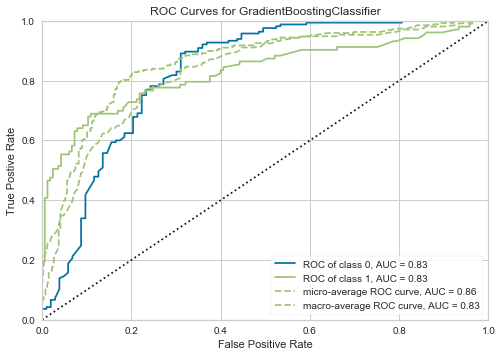

In [17]:
plot_model(gbc, plot = 'auc')

#### 6.2 Feature Importance 

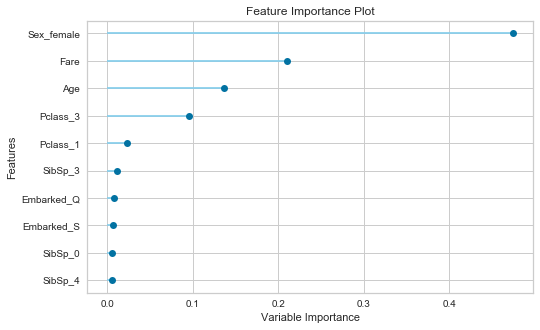

In [18]:
plot_model(gbc, plot='feature')

#### 6.3 Confusion Matrix

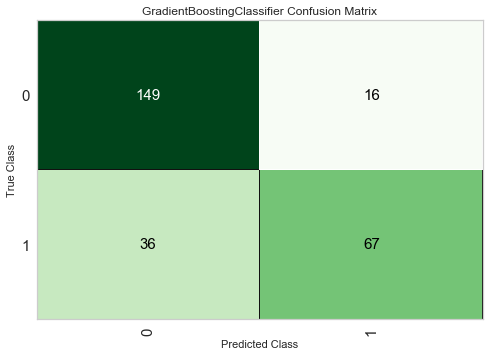

In [19]:
plot_model(gbc, plot = 'confusion_matrix')

#### 6.4 Decision Boundary

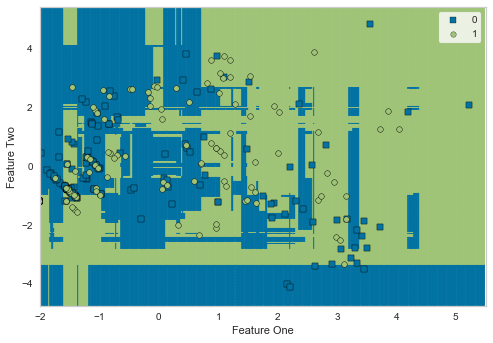

In [20]:
plot_model(gbc, plot = 'boundary')

### 7. Predict on test set

Use best model to predict on test set

In [21]:
predict_model(gbc)

Model  Accuracy     AUC  Recall   Prec.      F1  \
0  Gradient Boosting Classifier     0.806  0.8295  0.6505  0.8072  0.7204   

    Kappa  
0  0.5745

Age      Fare  Pclass_1  Pclass_2  Pclass_3  Sex_female  SibSp_0  \
0    0.000000 -0.135658       0.0       0.0       1.0         1.0      0.0   
1    0.023154 -0.486337       0.0       0.0       1.0         0.0      1.0   
2    2.331785 -0.113846       1.0       0.0       0.0         0.0      1.0   
3   -0.438572 -0.356469       0.0       1.0       0.0         1.0      1.0   
4    0.869652 -0.255795       0.0       1.0       0.0         1.0      1.0   
..        ...       ...       ...       ...       ...         ...      ...   
263 -0.515526 -0.386671       0.0       1.0       0.0         0.0      1.0   
264  0.000000  3.932723       1.0       0.0       0.0         0.0      1.0   
265  0.330972  0.005956       0.0       1.0       0.0         1.0      0.0   
266  1.331378 -0.467209       0.0       0.0       1.0         0.0      1.0   
267 -0.053800 -0.486337       0.0       0.0       1.0         0.0      1.0   

     SibSp_1  SibSp_2  SibSp_3  ...  Parch_3  Parch_4  Parch_5  Parch_6  \
0        0.0      0.0      1.0  ...      0.0      0.0      0.0      0.0   
1        0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
2        0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
3        0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
4        0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
..       ...      ...      ...  ...      ...      ...      ...      ...   
263      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
264      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
265      1.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
266      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   
267      0.0      0.0      0.0  ...      0.0      0.0      0.0      0.0   

     Embarked_C  Embarked_Q  Embarked_S  Survived  Label   Score  
0           0.0         0.0         1.0         0      0  0.0913  
1           0.0         0.0         1.0         0      0  0.0998  
2           0.0         0.0         1.0         0      0  0.3126  
3           0.0         0.0         1.0         1      1  0.6648  
4           0.0         0.0         1.0         1      1  0.8820  
..          ...         ...         ...       ...    ...     ...  
263         0.0         0.0         1.0         0      0  0.0809  
264         1.0         0.0         0.0         0      0  0.2685  
265         0.0         0.0         1.0         1      1  0.9174  
266         0.0         0.0         1.0         0      0  0.0611  
267         0.0         0.0         1.0         0      0  0.0998  

[268 rows x 26 columns]

### 8. Deploy Model

In [22]:
final_gbc = finalize_model(gbc)
final_gbc

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=2345, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

### 9. Save Model

In [24]:
save_model(final_gbc,'Final_GBC_Model_20200422')

Transformation Pipeline and Model Succesfully Saved


### 10. Load Model

In [25]:
saved_final_gbc = load_model('Final_GBC_Model_20200422')

Transformation Pipeline and Model Sucessfully Loaded


#### 10.1 Predict on unseen data

In [27]:
pred = predict_model(saved_final_gbc, data=titanic_test_data)
pred.head(10)

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  Label   Score  
0  34.5      0      0     330911   7.8292   NaN        Q      0  0.0543  
1  47.0      1      0     363272   7.0000   NaN        S      0  0.2855  
2  62.0      0      0     240276   9.6875   NaN        Q      0  0.2062  
3  27.0      0      0     315154   8.6625   NaN        S      0  0.1443  
4  22.0      1      1    3101298  12.2875   NaN        S      0  0.4136  
5  14.0      0      0       7538   9.2250   NaN        S      0  0.1063  
6  30.0      0      0     330972   7.6292   NaN        Q      1  0.5085  
7  26.0      1      1     248738  29.0000   NaN        S      0  0.1589  
8  18.0      0      0       2657   7.2292   NaN        C      1  0.8884  
9  21.0      2      0  A/4 48871  24.1500   NaN        S      0  0.0891